# **ANALÍTICA DE DATOS PARA LA TOMA DE DECISIONES**
**DEPARTAMENTO DE INGENIERÍA INDUSTRIAL**

**SEMESTRE 2024-1**

**REALIZADO POR:** LEIDYS GUERRERO LOBO, JUAN ESTEBAN CARDONA MOLINA, MATEO CAICEDO AGUIRRE, GILBERTO JOSÉ GIL PACHECO.

## **1. DESCRIPCIÓN DEL PROBLEMA**

**INTRODUCCIÓN**

En el mundo actual, donde la tecnología juega un papel crucial en casi todos los aspectos de la vida, las empresas financieras, específicamente, están constantemente buscando formas innovadoras para mejorar sus servicios y aumentar la eficiencia operativa. Una de las áreas más prometedoras es el uso de inteligencia artificial y aprendizaje profundo para la automatización de tareas repetitivas y propensas a errores humanos. Este trabajo aborda el problema de la clasificación de dígitos escritos a mano utilizando el dataset MNIST, y cómo su solución puede beneficiar significativamente a una empresa financiera.


---


**DESCRIPCIÓN DEL PROBLEMA DE NEGOCIO**

En el sector financiero, principalmente, la gestión de facturas es un proceso importante para la contabilidad y el cumplimiento normativo. A pesar del crecimiento digital que han tenido las empresas en los últimos años y que están optando por facturas digitales, hay varias empresas que aún reciben facturas escritas a mano, especialmente de proveedores o clientes más pequeños, o incluso de costos mínimos que de igual manera deben ser tenidos en cuenta para los estados financieros de una empresa. Estas facturas presentan varios desafíos, ente ellos:

*  **La precisión:** La entrada manual de datos de facturas en los sistemas de contabilidad es propensa a errores humanos. Errores en la transcripción pueden llevar a inconsistencias contables y problemas de auditoría.
*  **Tiempos prologados:** El proceso de digitalización manual de estas facturas consume mucho tiempo y requiere personal dedicado.
*  **Cumplimiento normativo:** Las empresas deben asegurarse de que todas las transacciones están documentadas y contabilizadas correctamente para cumplir con las regulaciones financieras establecidas por la ley. Errores en la documentación pueden resultar en sanciones o multas costosas.
*  **Eficiencia operacional:** La demora en la entrada de datos afecta el flujo de caja y la capacidad de la empresa para tomar decisiones financieras rápidas y basadas en datos precisos.



---


**PROPUESTA DE SOLUCIÓN**

Una **solución** a esta problemática, basados en redes neuronales convolucionales, entrenadas con el conjunto de datos MNIST (el cual se encarga de reconocer caracteres y números escritos a mano), se busca implementar una herramienta la cual se encargaría de la lectura de estos datos. Esta solución busca automatizar la digitalización de facturas manuscritas en un sistema contable para las empresas.
Esta herramienta contribuirá con beneficios para la empresa tales como:
*  **La reducción de errores:** buscando alcanzar una alta precisión en el reconocimiento de datos manuscritos.
*  **Ahorrar tiempo:** la automatización del proceso de digitalización de facturas reduce la necesidad de personal dedicado a esta tarea, por lo que se podría aprovechar para realizar otras actividades o incluso una auditoria en tiempo real de la misma. Esto mejoraría el flujo de caja y la capacidad de respuesta de la empresa a las demandas del mercado.
*  Una vez implementada esta herramienta se buscaría entonces poder manejar un volumen más alto de facturas potenciando el crecimiento para la empresa y capacitada para aumentar su número de clientes o proveedores.



## **2. INSTALACIÓN DE LIBRERÍAS Y PAQUETES**

### **Librerías necesarias**

In [6]:
#Instalar y actualizaciones
!pip install --upgrade keras
!pip install keras-tuner
!pip install --upgrade scikit-learn
!pip install keras-tuner pydot graphviz

  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [11]:
#Bibliotecas necesarias
import numpy as np
import pandas as pd
import tensorflow as tf # Framework de deep learning
from tensorflow import keras # API que contiene la mayoría de funciones para las RN

import matplotlib.pyplot as plt
from keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras_tuner import RandomSearch
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Función para graficar el Accuracy y Loss

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Gráfica de Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento', color='navy')
    plt.plot(history.history['val_accuracy'], label='Prueba', linestyle='--', color='dodgerblue')
    plt.title('Accuracy del modelo')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Gráfica de Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento', color='navy')
    plt.plot(history.history['val_loss'], label='Prueba', linestyle='--', color='dodgerblue')
    plt.title('Pérdida del modelo')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout() # Ajustar la disposición de las gráficas para evitar solapamientos
    plt.show()

## **3. LECTURA DE DATOS**

### **Cargar los datos**

In [ ]:
#Cargar los datos de mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Verificar dimensiones de los conjutnos de datos de train y validación
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Tenemos 60.000 imágenes para entrenamiento con 28x28 px, y para validación se tienen 10.000 imágenes con los mismos pixeles.

In [ ]:
#Valores únicos en y_train
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

Para este conjunto de datos hay 10 clases posibles de números (Desde el 0 hasta el 9) y cada clase está ligeramente equilibrada con el resto, se esperaría una distribución del 10% para cada clase, sin embargo, la clase mayor tiene el 11.24% de los datos y la menor tiene el 9.04% de los mismos, con una diferencia entre estos inferior al 2.3%, por lo que podemos trabajar como si fueran clases equilibradas.

8


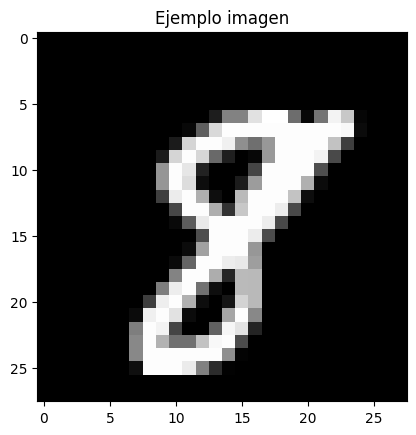

In [ ]:
plt.imshow(x_train[55], cmap = 'gray')
plt.title('Ejemplo imagen')
print(y_train[55])

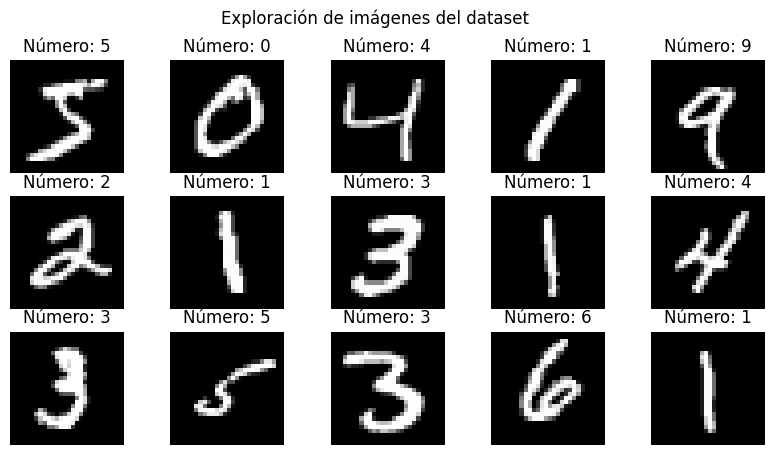

In [ ]:
#Visualización de algunas imágenes del dataset
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Número: {y_train[i]}")
    plt.axis('off')
plt.suptitle('Exploración de imágenes del dataset')
plt.show()

### **Estandarización de los datos**

In [ ]:
# Estandarizar los datos
x_train_new = x_train/255
x_test_new = x_test/255
x_train_new.shape

(60000, 28, 28)

## **4. REDES NEURONALES ARTIFICIALES** (Opcional)

Inicialmente, se creó un modelo de red neuronal artificial (ANN) con el único fin de comparar los resultados de la red neuronal con la red convolucional (CNN), se parte entonces del supuesto de que CNN debería dar mejores resultados en cuanto `accuracy` y `loss`, esto debido a que las CNNs son mejores para la detección de imagenes.

In [ ]:
# Tamaño del dataset
filas = 28
colum = 28

Funciones de activación:


*   Relu : Retornar siempre valores positivos, los negativos los vuelve 0 - con tareas de regresión.
*   Sigmoid: Retorna valores entre 0 y 1 - Tareas de clasificación binaria.
*   Softmax: Clasificación multicalse.
*   Tanh: Es la mejor funciona en capas ocultas.



In [ ]:
#Creación de la red neuronal
ann1 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape = [filas, colum]),
     keras.layers.Dense(128, activation = 'relu'),
     keras.layers.Dense(64, activation = 'relu'),
     keras.layers.Dense(10, activation = 'softmax')] #Respuesta al problema de clasificación, 1 neurona por cada tipo de clase
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
## Entrenamiento de la red neuronal
ann1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#ann1.fit(x_train_new, y_train, epochs = 5)

El 85% de los datos de entrenamiento se predicen correctamente en la primera iteración, a medida que se aumentan las iteraciones se mejora el accuracy de los datos.

### **Validación de overfiting**

In [ ]:
history = ann1.fit(x_train_new, y_train, epochs=10, validation_data=(x_test_new, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8772 - loss: 0.4209 - val_accuracy: 0.9591 - val_loss: 0.1288
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9660 - loss: 0.1095 - val_accuracy: 0.9701 - val_loss: 0.0980
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9789 - loss: 0.0683 - val_accuracy: 0.9733 - val_loss: 0.0859
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9828 - loss: 0.0523 - val_accuracy: 0.9751 - val_loss: 0.0797
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9867 - loss: 0.0414 - val_accuracy: 0.9742 - val_loss: 0.0903
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9892 - loss: 0.0340 - val_accuracy: 0.9767 - val_loss: 0.0794
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.9727 - val_loss: 0.1034
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9936 - loss: 0.0208

In [ ]:
history.history.keys() #Diccionario con las metricas de entrenamiento y validación

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

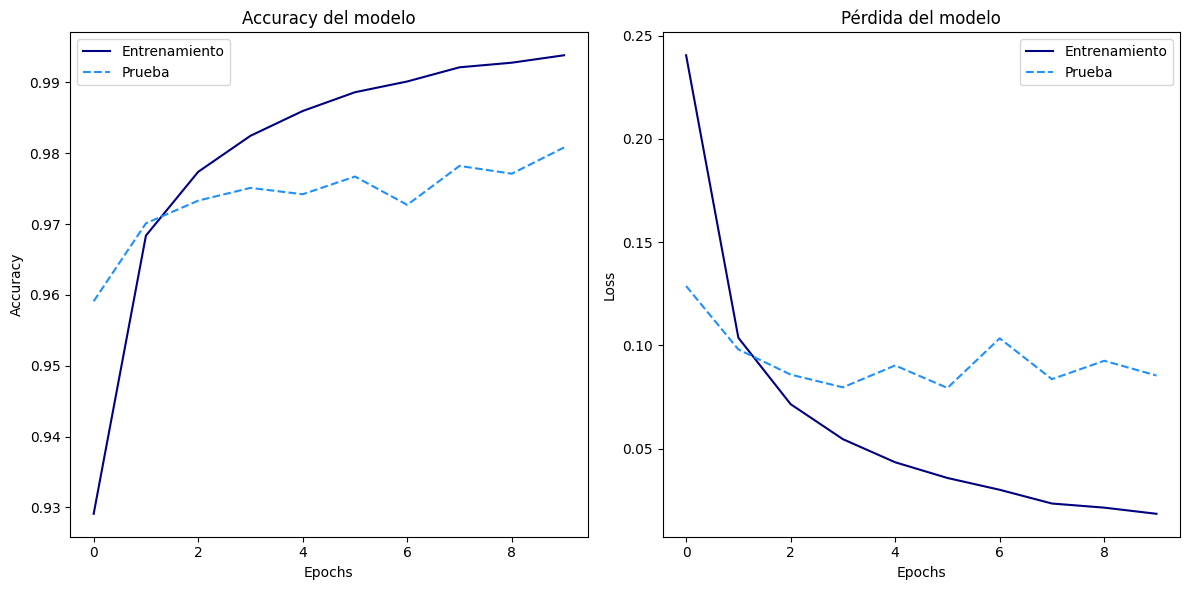

In [ ]:
plot_history(history)

Como se ve en el gráfico, y de acuerdo con los resultados de la validación, vemos que la red aprende muy rápido, y logra obtener muy buenas métricas. Sin embargo se considera la regularización para validar los resultados nuevamente.

### **ANN regularizada - L2**

Se busca mediante la `regularizer` lograr ajustar el modelo para controlar el sobreajuste.

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
#Red neuronal regularizada
ann2 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape = [filas, colum]),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

ann2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history2 = ann2.fit(x_train_new, y_train, epochs=10, validation_data=(x_test_new, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9174 - loss: 0.4667 - val_accuracy: 0.9272 - val_loss: 0.3704
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9419 - loss: 0.3283 - val_accuracy: 0.9583 - val_loss: 0.2724
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9500 - loss: 0.2917 - val_accuracy: 0.9570 - val_loss: 0.2647
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9548 - loss: 0.2660 - val_accuracy: 0.9593 - val_loss: 0.2417
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9561 - loss: 0.2554 - val_accuracy: 0.9609 - val_loss: 0.2442
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9586 - loss: 0.2382 - val_accuracy: 0.9640 - val_loss: 0.2201
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9584 - loss: 0.2371 - val_accuracy: 0.9487 - val_loss: 0.2682
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9583 - loss: 0.

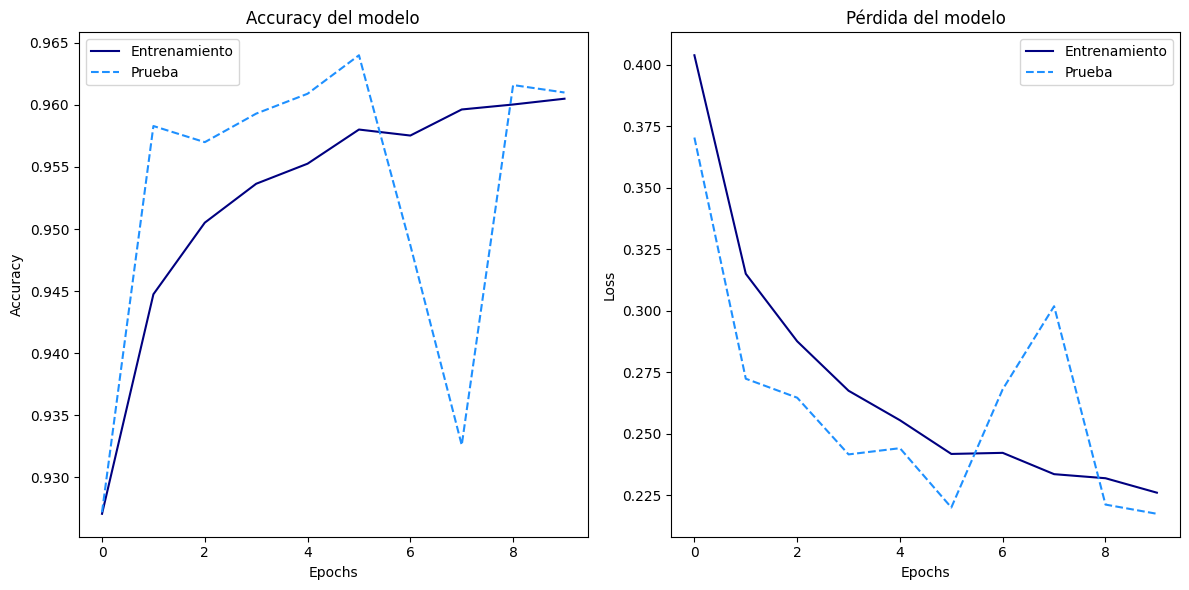

In [ ]:
plot_history(history2)

Como muestran los gráficos, se evidencia un aprendizaje rápido nuevamente en el modelo, sin embargo, a comparación del modelo anterior este es más conservador en cuanto al `accuracy` y `loss`, por lo que sugiere que se pudo tratar el *overfitting*

### **ANN Regularizada - Dropout**

In [ ]:
ann3 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape = [filas, colum]),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

ann3.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history3 = ann3.fit(x_train_new, y_train, epochs=10, validation_data=(x_test_new, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9314 - loss: 0.2241 - val_accuracy: 0.9639 - val_loss: 0.1101
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9573 - loss: 0.1346 - val_accuracy: 0.9699 - val_loss: 0.0917
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9677 - loss: 0.1065 - val_accuracy: 0.9741 - val_loss: 0.0793
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9715 - loss: 0.0919 - val_accuracy: 0.9748 - val_loss: 0.0888
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9755 - loss: 0.0780 - val_accuracy: 0.9773 - val_loss: 0.0719
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9773 - loss: 0.0716 - val_accuracy: 0.9770 - val_loss: 0.0735
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9784 - loss: 0.0648 - val_accuracy: 0.9759 - val_loss: 0.0735
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9804 - loss: 0.06

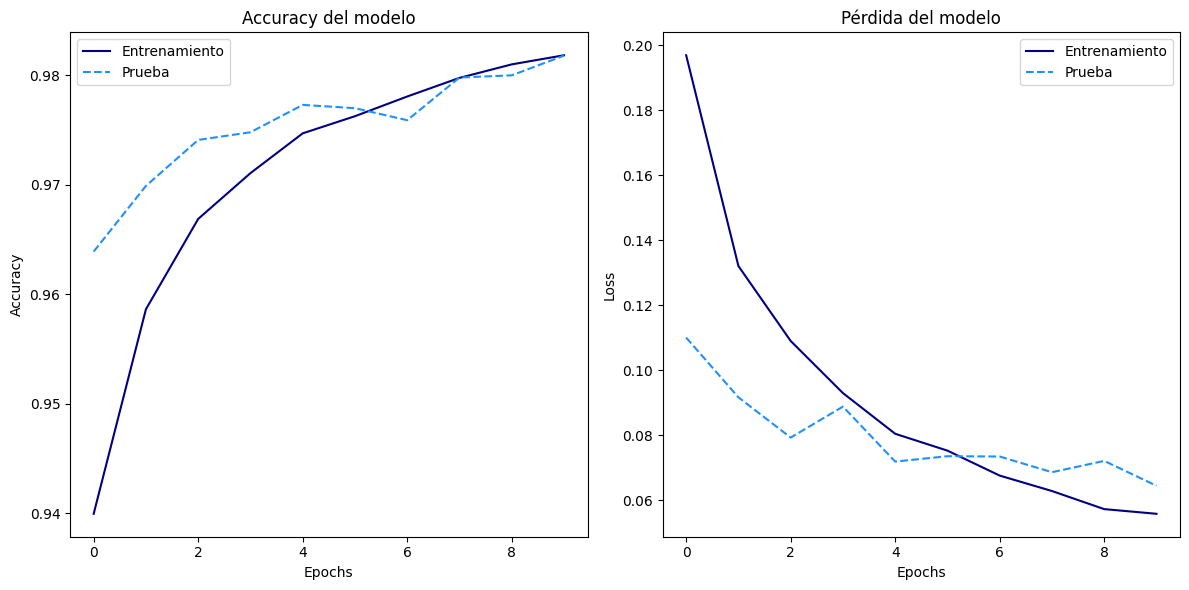

In [ ]:
plot_history(history3)

### **Tuning Hiperparámetros**

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))

    ## Definición de la primera Capa Oculta con ajute de hiperparametros
    ## Elegir numero optimo de neuronas
    hp_unit_1 = hp.Int('unit_1', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_unit_1, activation='relu'))

    ## Definición de capa de dropout
    ## Elegir el dropout rate optimo - Regularizacion
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.3, step=0.1)
    model.add(keras.layers.Dropout(hp_dropout_rate))

    ## Definición de segunda capa oculta con ajuste de hiperparametros
    ## Elegir funcion de activacion optima
    hp_activation_2 = hp.Choice('activation', values=['relu', 'tanh'])
    hp_unit_2 = hp.Int('unit_2', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_unit_2, activation=hp_activation_2))

    ## Definicion de la capa de salida
    model.add(keras.layers.Dense(10, activation='softmax'))

    ## Definicion de la tasa de aprendizaje (learning_rate) del optimizador
    ## Elegir un valor optimo entre 0.1, 0.01, 0.001, 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
### Definición del Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='results_tuner',
    project_name='Demo'
)

In [ ]:
## Ejecutar tuning de hiperparametros
tuner.search(x_train_new, y_train, epochs=5, validation_data=(x_test_new, y_test))

Trial 5 Complete [00h 01m 34s]
val_accuracy: 0.9786999821662903

Best val_accuracy So Far: 0.9786999821662903
Total elapsed time: 00h 07m 14s


In [ ]:
# Mostrar el mejor modelo
for h_param in [f"unit_{i}" for i in range(1,3)] + ['activation'] + ['learning_rate']:
    print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

unit_1 288
unit_2 352
activation tanh
learning_rate 0.001


In [ ]:
# Almacenar el mejor modelo
best_model = tuner.get_best_models()[0]

# Resumen de la arquitectura
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 288)                 │         226,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 352)                 │         101,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           3,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 331,338 (1.26 MB)

 Trainable params: 331,338 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history4 = best_model.fit(x_train_new, y_train, epochs = 10, validation_data = (x_test_new, y_test))

### Cual es el epoch con max val_accuracy
val_accuracy_per_epoch = history.history['val_accuracy']
best_epoch = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch))+1
print(f"Best epoch: {best_epoch}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9835 - loss: 0.0518 - val_accuracy: 0.9785 - val_loss: 0.0728
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9858 - loss: 0.0407 - val_accuracy: 0.9794 - val_loss: 0.0754
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9876 - loss: 0.0360 - val_accuracy: 0.9797 - val_loss: 0.0685
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 0.9788 - val_loss: 0.0810
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9893 - loss: 0.0315 - val_accuracy: 0.9850 - val_loss: 0.0609
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9897 - loss: 0.0291 - val_accuracy: 0.9824 - val_loss: 0.0759
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9812 - val_loss: 0.0792
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9919 - loss: 0

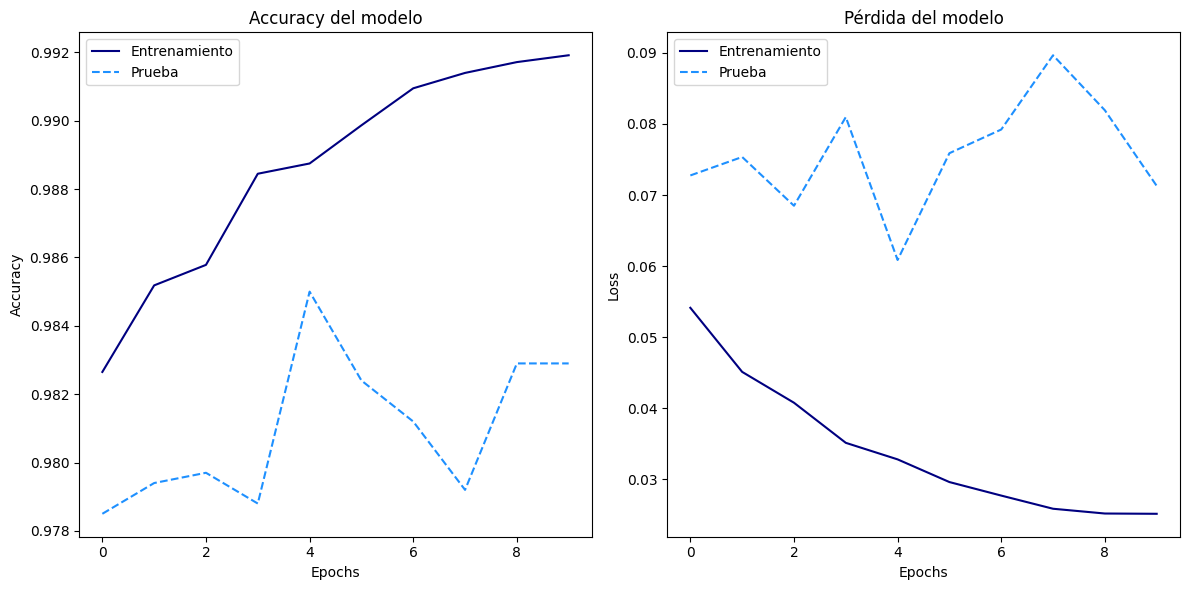

In [ ]:
plot_history(history4)

In [ ]:
### Utilizar el metodo evaluate para evaluar la red neuronal
test_loss, test_accuracy = best_model.evaluate(x_test_new, y_test)
print('Test accuracy: ', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0910
Test accuracy:  0.9829000234603882


De acuerdo con los resultados del último modelo, la red neuronal ha logrado una precisión del 98.29% en un conjunto de datos de prueba, por lo que, al hacer la clasificación de los datos, lo hace correctamente el 98% de las veces.

## **5. REDES CONVOLUCIONALES**

Entrando nuevamente en contexto de la problemática, para abordar los desafíos expuestos, se propone desarrollar un modelo de red neuronal convolucional (CNN) que utilice el dataset MNIST para clasificar dígitos escritos a mano. Las CNNs son particularmente adecuadas para tareas de reconocimiento de patrones en imágenes debido a su capacidad para capturar características espaciales y jerárquicas.

In [ ]:
# Definición de la arquitectura de la red neuronal
model_cnn = Sequential()

# Capa convolucional
model_cnn.add(Conv2D(32, kernel_size=(3, 3),strides= (2,2), activation='relu', input_shape=(28, 28, 1)))

# Capa de agrupación
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

# Aplanar los datos para la capa densa
model_cnn.add(Flatten())

# Capa densa con dropout
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))

# Capa de salida
model_cnn.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_cnn.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_cnn = model_cnn.fit(x_train_new, y_train, epochs=10, validation_data=(x_test_new, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8133 - loss: 0.5962 - val_accuracy: 0.9692 - val_loss: 0.0972
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9517 - loss: 0.1578 - val_accuracy: 0.9749 - val_loss: 0.0712
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9652 - loss: 0.1136 - val_accuracy: 0.9792 - val_loss: 0.0634
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9708 - loss: 0.0956 - val_accuracy: 0.9819 - val_loss: 0.0517
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9748 - loss: 0.0819 - val_accuracy: 0.9846 - val_loss: 0.0445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9786 - loss: 0.0676 - val_accuracy: 0.9858 - val_loss: 0.0467
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9807 - loss: 0.0632 - val_accuracy: 0.9851 - val_loss: 0.0463
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9828 - los

Para crear el modelo inicial, se usaron entonces parámetros comunmente utilizados para la creación de un modelo de CNN.


**Capa Convolucional (Conv2D)**: Con un `filter` de 32 para comenzar el cual se considera un valor bajo. Además un `kernel_size` de tamaño 3×3, el cual se encarga buscar patrones en la imagen en una ventana de ese tamaño. Un `strides` de 2×2, para realizar un saldo de 2 píxeles en cada dirección durante la convolución. Y finalmente una `activation` `relu` para evitar la linealidad en la red.


---


**Capa de Agrupación (MaxPooling2D):** Se ha seleccionado un tamaño de pool de (2, 2), lo que significa que se tomará el máximo valor en cada ventana de 2x2.


---

**Capa Densa:** `units` se ha elegido 128 neuronas en la capa densa. Y, nuevamente, se ha elegido `relu` como función de activación para introducir no linealidades en la red.


---

**Capa de Salida:** Finalmente se ha seleccionado una capa de salida de 10 neuronas, ya que el modelo es de clasificación multiclase con solo 10 clases (números del 0 al 9) y para esto es necesario usar la función de activación `softmax`




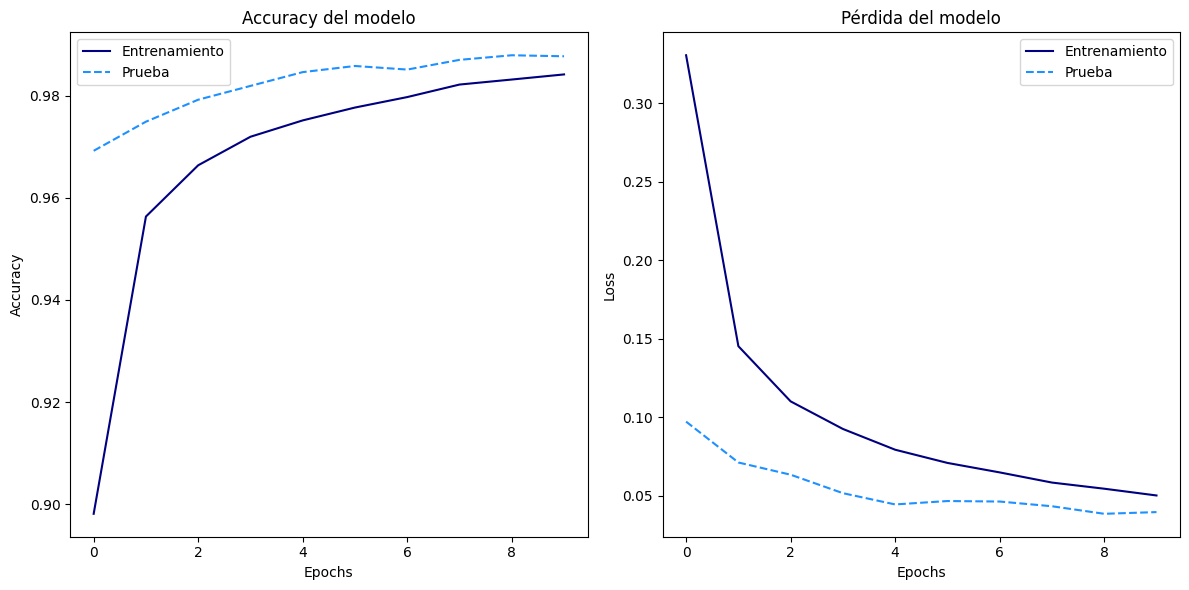

In [ ]:
plot_history(history_cnn)

Como resultado de este primer modelo CNN, se puede evidenciar que al igual que ANN, aprende muy rápido a medida que se aumentan las `epochs`, logrando una altra precisión en los conjuntos de entrenamiento y prueba, sin embargo se consideró una regularización para evitar que el modelo tenga overfiting

### **CNN regularizada - L2**

In [ ]:
from keras.regularizers import l2

In [ ]:
# Definición de la arquitectura de la red neuronal
model_cnn2 = Sequential()

# Capa convolucional
model_cnn2.add(Conv2D(32, kernel_size=(3, 3),strides= (2,2), activation='relu', input_shape=(28, 28, 1)))

# Capa de agrupación
model_cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

# Aplanar los datos para la capa densa
model_cnn2.add(Flatten())

# Capa densa con regularización L2 y dropout
model_cnn2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model_cnn2.add(Dropout(0.5))

# Capa de salida
model_cnn2.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_cnn2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_cnn2 = model_cnn2.fit(x_train_new, y_train, epochs=10, validation_data=(x_test_new, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7865 - loss: 1.1134 - val_accuracy: 0.9532 - val_loss: 0.3657
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9156 - loss: 0.4576 - val_accuracy: 0.9590 - val_loss: 0.3046
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9293 - loss: 0.3942 - val_accuracy: 0.9593 - val_loss: 0.2864
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9390 - loss: 0.3595 - val_accuracy: 0.9605 - val_loss: 0.2839
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9393 - loss: 0.3510 - val_accuracy: 0.9647 - val_loss: 0.2604
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9411 - loss: 0.3351 - val_accuracy: 0.9680 - val_loss: 0.2545
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9444 - loss: 0.3282 - val_accuracy: 0.9705 - val_loss: 0.2439
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9474 - loss: 

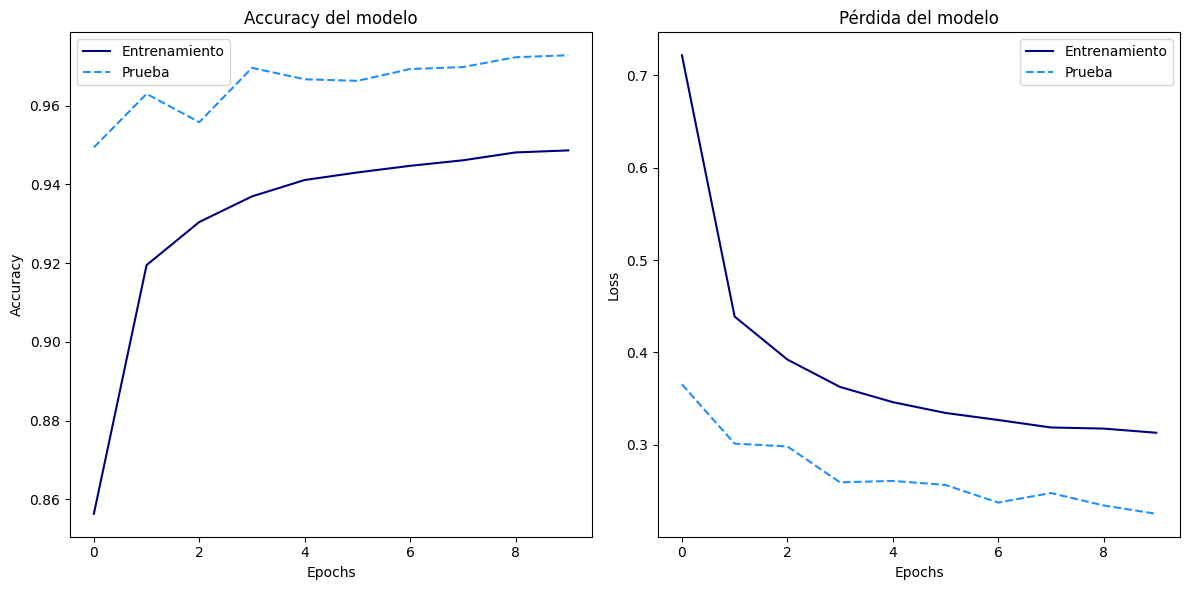

In [ ]:
plt.figure(figsize=(12, 6))

# Gráfica de Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn2.history['accuracy'], label='Entrenamiento', color='navy')
plt.plot(history_cnn2.history['val_accuracy'], label='Prueba', linestyle='--', color='dodgerblue')
plt.title('Accuracy del modelo')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de Loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn2.history['loss'], label='Entrenamiento', color='navy')
plt.plot(history_cnn2.history['val_loss'], label='Prueba', linestyle='--', color='dodgerblue')
plt.title('Pérdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout() # Ajustar la disposición de las gráficas para evitar solapamientos
plt.show()

Con la regularización del modelo se tienen entonces resultados más conservadores, y esto pudo sugerir una mejora o tratamiento del sobreajuste.

**Aquí una representación gráfica de lo mencionado anteriormente con base a la construcción del modelo:**

In [ ]:
## Compilación del modelo
model_cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model_cnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,194 (582.79 KB)

 Trainable params: 149,194 (582.79 KB)

 Non-trainable params: 0 (0.00 B)

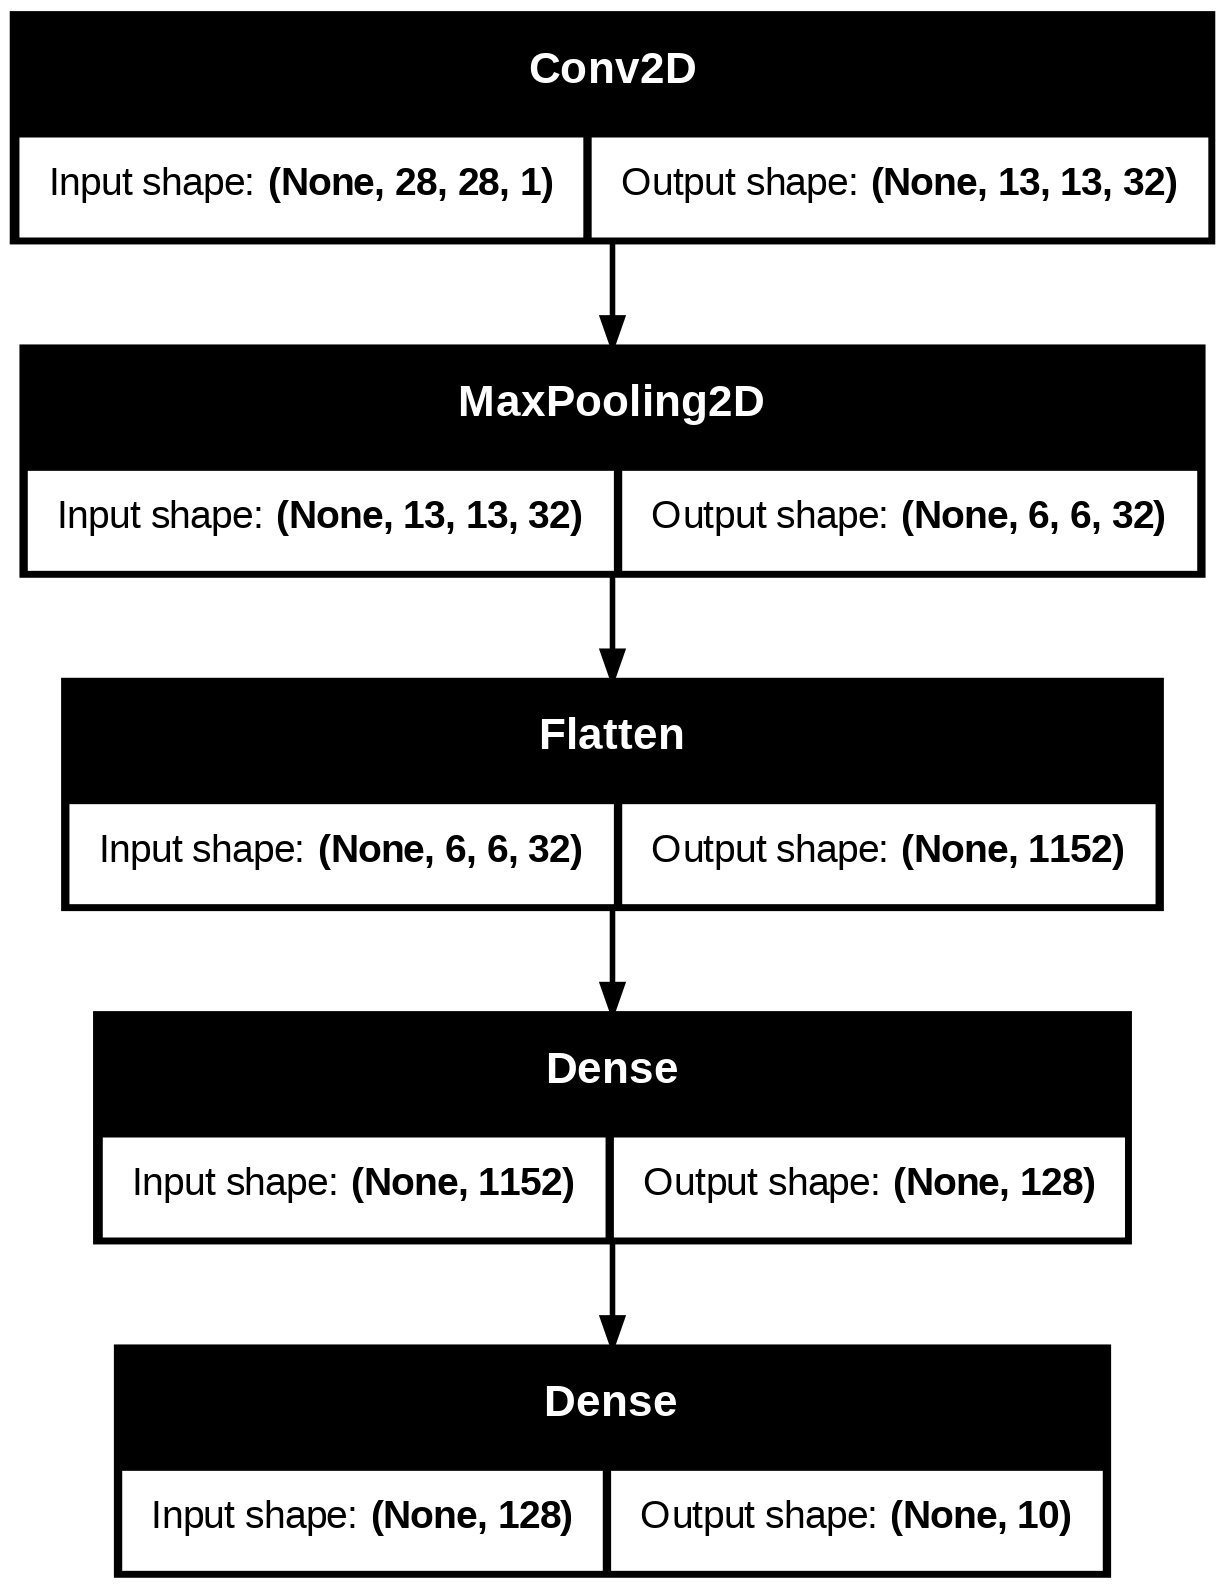

In [ ]:
keras.utils.plot_model(
  model_cnn,
  show_shapes = True
)

### **Comparación de ANN y CNN**

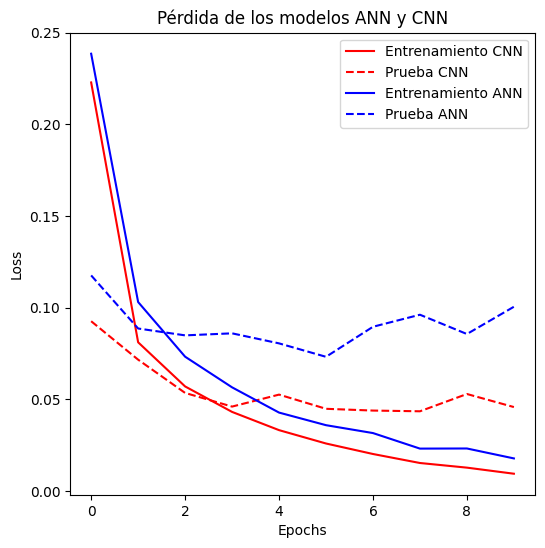

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura
plt.figure(figsize=(6, 6))

# Gráfica del modelo CNN
plt.plot(history_cnn1.history['loss'], 'r', label='Entrenamiento CNN')
plt.plot(history_cnn1.history['val_loss'], 'r--', label='Prueba CNN')

# Gráfica del modelo ANN
plt.plot(history.history['loss'], 'b', label='Entrenamiento ANN')
plt.plot(history.history['val_loss'], 'b--', label='Prueba ANN')

# Título y etiquetas
plt.title('Pérdida de los modelos ANN y CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


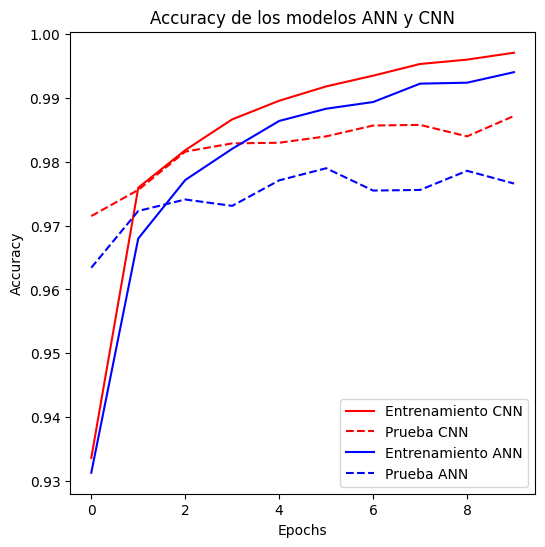

In [ ]:
# Crear una figura
plt.figure(figsize=(6, 6))

# Gráfica del modelo CNN
plt.plot(history_cnn1.history['accuracy'], 'r', label='Entrenamiento CNN')
plt.plot(history_cnn1.history['val_accuracy'], 'r--', label='Prueba CNN')

# Gráfica del modelo ANN
plt.plot(history.history['accuracy'], 'b', label='Entrenamiento ANN')
plt.plot(history.history['val_accuracy'], 'b--', label='Prueba ANN')

# Título y etiquetas
plt.title('Accuracy de los modelos ANN y CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

Como lo mencionabamos en el supuesto, confirmamos la hipótesis de que el modelo CNN se comporta mejor que el modelo ANN, sin embargo la diferencia no es tan grande, por lo que se podría trabajar con cualquiera de los dos, sin embargo, al considerar que estamos trabajando con imagenes que al final de cuentas representan dinero o descuadres en un sector financiero se prefiere un modelo que tenga una mayor precisión y que esté designado para su tarea principal, por lo que **se decide conservar el modelo CNN**.

### **Evaluación de la Red**

In [ ]:
## Evaluación de la red con dataset de test
from sklearn.metrics import classification_report
class_name= ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

y_hat = np.argmax(model_cnn.predict(x_test_new), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
print(classification_report(y_test, y_hat, target_names=class_name))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Teniendo en cuenta estos resultados se aprecia que el modelo predice bastante bien cada clase, con valores que alcanzan casi que el 100% de su presición. Sin embargo se considera el ajuste de hiperparámetros para optimizar las métricas y comparar resultados.

### **Tuning de Hiperparámetros**

Se construye una función la cual se encargará de variar los parámetros que recibe el modelo, y mediante el uso de un `RandomSearch` el cual se encarga de escoger parámetros aleatorios, busca optimizar los resultados del modelo.

In [ ]:
def build_cnn_model(hp):
    model = Sequential()

    # Definición de la primera capa convolucional
    hp_filters_1 = hp.Int('filters_1', min_value=16, max_value=64, step=16)
    hp_kernel_size_1 = hp.Int('kernel_size_1', min_value=3, max_value=5, step=2)
    model.add(Conv2D(hp_filters_1, kernel_size=(hp_kernel_size_1, hp_kernel_size_1), activation='relu', input_shape=(28, 28, 1)))

    # Definición de la primera capa de agrupación
    hp_pool_size_1 = hp.Int('pool_size_1', min_value=2, max_value=4, step=1)
    model.add(MaxPooling2D(pool_size=(hp_pool_size_1, hp_pool_size_1)))

    # Definición de la segunda capa convolucional
    hp_filters_2 = hp.Int('filters_2', min_value=16, max_value=64, step=16)
    hp_kernel_size_2 = hp.Int('kernel_size_2', min_value=3, max_value=5, step=2)
    model.add(Conv2D(hp_filters_2, kernel_size=(hp_kernel_size_2, hp_kernel_size_2), activation='relu'))

    # Definición de la segunda capa de agrupación
    hp_pool_size_2 = hp.Int('pool_size_2', min_value=2, max_value=4, step=1)
    model.add(MaxPooling2D(pool_size=(hp_pool_size_2, hp_pool_size_2)))

    # Aplanar los datos para la capa densa
    model.add(Flatten())

    # Definición de la primera capa densa
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units_1, activation='relu'))

    # Definición de la capa de dropout
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.3, step=0.1)
    model.add(Dropout(hp_dropout_rate))

    # Definición de la segunda capa densa
    hp_units_2 = hp.Int('units_2', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units_2, activation='relu'))

    # Definición de la capa de salida
    model.add(Dense(10, activation='softmax'))

    # Definición de la tasa de aprendizaje (learning_rate) del optimizador
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


Para este ajuste, se sugirieron valores conservadores ya que, de por sí, el modelo ya predice bastante bien los datos y también con el fin de hacer una copilación más 'rápida' del modelo.

In [ ]:
tuner_cnn = RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1, #2
    directory='results_tuner_cnn',
    project_name='Demo_CNN'
)

Con esto lo que buscamos es, mediante una selección aleatoria de los datos propuestos con anterioridad mejorar el `accuracy` para los datos de validación.
Se consideró un máximo de 5 ensayos con 1 ejecución por ensayo, esto con el fin de hacer el modelo más eficiente, sin embargo se considerarion hasta 2 ejecuciones por ensayo, pero, esto no cambiaba tanto los resultados.

In [ ]:
## Ejecutar tuning de hiperparametros
tuner_cnn.search(x_train_new, y_train, epochs=5, validation_data=(x_test_new, y_test))

Trial 5 Complete [00h 03m 18s]
val_accuracy: 0.9886999726295471

Best val_accuracy So Far: 0.9911999702453613
Total elapsed time: 01h 56m 20s


Se trabajó con pocas `epochs`, ya que, como se mencionaba anteriormente, el modelo logra predecir con facilidad los datos, aunque, cabe resalta, que a medida que se incrementan las `epochs` el modelo tiende a mejorar. Teniendo muy presente el evitar hacer sobreajuste.


---

El `accuracy` para la validación, finalmente, logra un resultado muy positivo de más del 98%, logrando predecir casi que en su totalidad de los datos de prueba.

In [ ]:
### Almacenar el mejor modelo
best_model_cnn = tuner_cnn.get_best_models()[0]

### Resumen de la arquitectura
best_model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 448)                 │         258,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 352)                 │         158,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           3,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 457,642 (1.75 MB)

 Trainable params: 457,642 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn3 = best_model_cnn.fit(x_train_new, y_train, epochs = 7, validation_data = (x_test_new, y_test))

### Cual es el epoch con max val_accuracy
val_accuracy_per_epoch = history_cnn3.history['val_accuracy']
best_epoch = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch))+1
print(f"Best epoch: {best_epoch}")

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9907 - loss: 0.0314 - val_accuracy: 0.9899 - val_loss: 0.0346
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.9934 - loss: 0.0222 - val_accuracy: 0.9909 - val_loss: 0.0324
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9941 - loss: 0.0192 - val_accuracy: 0.9899 - val_loss: 0.0385
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.9951 - loss: 0.0162 - val_accuracy: 0.9913 - val_loss: 0.0323
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9914 - val_loss: 0.0346
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 53ms/step - accuracy: 0.9956 - loss: 0.0141 - val_accuracy: 0.9934 - val_loss: 0.0293
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9965 - loss: 0.0119 - val_accuracy: 0.9910 - val_loss: 0.0413
Best epoch: 6


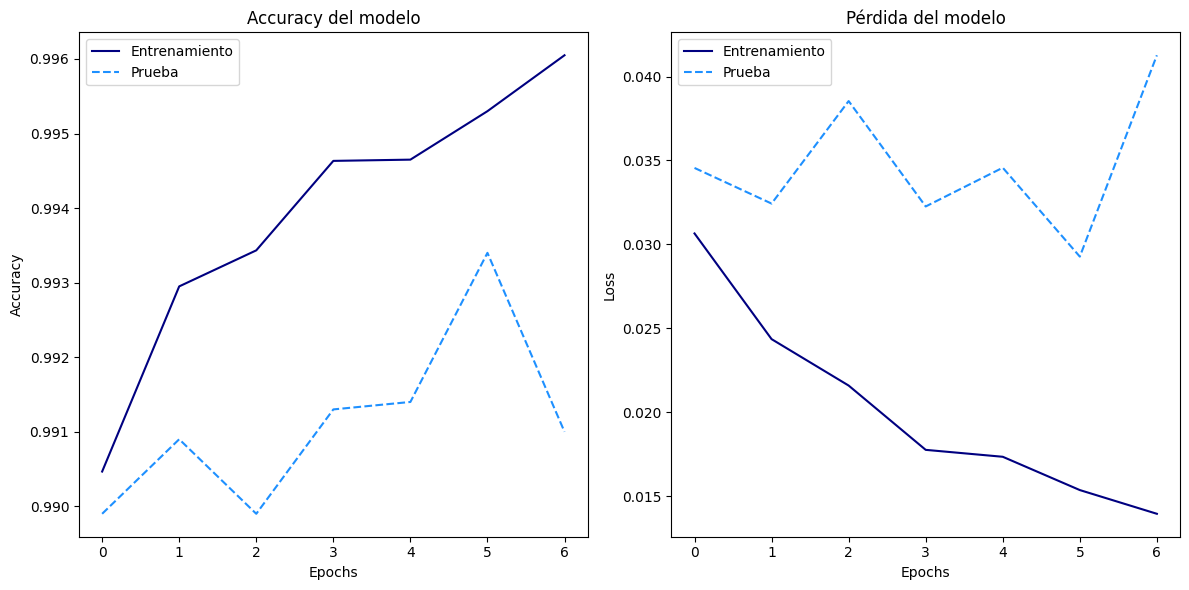

In [ ]:
plot_history(history_cnn3)

En los gráficos parece que los datos de entrenamiento y prueba tienen una amplia diferencia, sin embargo, al entrar en detalle se aprecia que la escala en ambos es incluso inferior al 0.01 por lo que están logrando una presición casi que exacta.

In [ ]:
# Evaluación de la red con dataset de test
from sklearn.metrics import classification_report
class_name= ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

y_hat = np.argmax(best_model_cnn.predict(x_test_new), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


In [ ]:
print(classification_report(y_test, y_hat, target_names=class_name))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



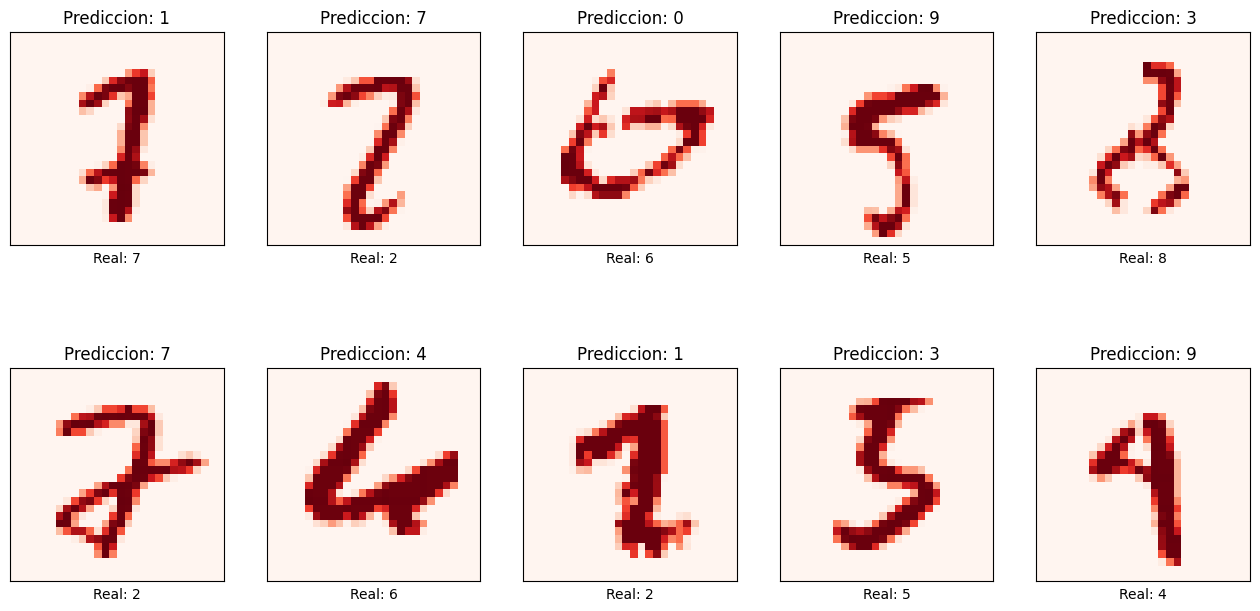

In [ ]:
errors = np.nonzero(y_hat != y_test)[0]
# Visualizar las primeras 10 predicciones erroneas
plt.figure(figsize=(16, 8))
for i, incorrect in enumerate(errors[0:10]):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[incorrect].reshape(28,28), cmap = 'Reds')
    plt.title("Prediccion: {}".format(class_name[y_hat[incorrect]]))
    plt.xlabel("Real: {}".format(class_name[y_test[incorrect]]))

Con respecto a la precisión, como se muestra en el gráfico anterior, se pueden presentar errores, esto debido, principalmente, a la redacción o a la manera en que el humano hace el manuscrito del número, también se puede deber al parecido que hay entre algunos números, sin embargo este error es infeior al 1%, lo cual sugiere que con una respectiva auditoría de un supervisor se puede controlar con facilidad.

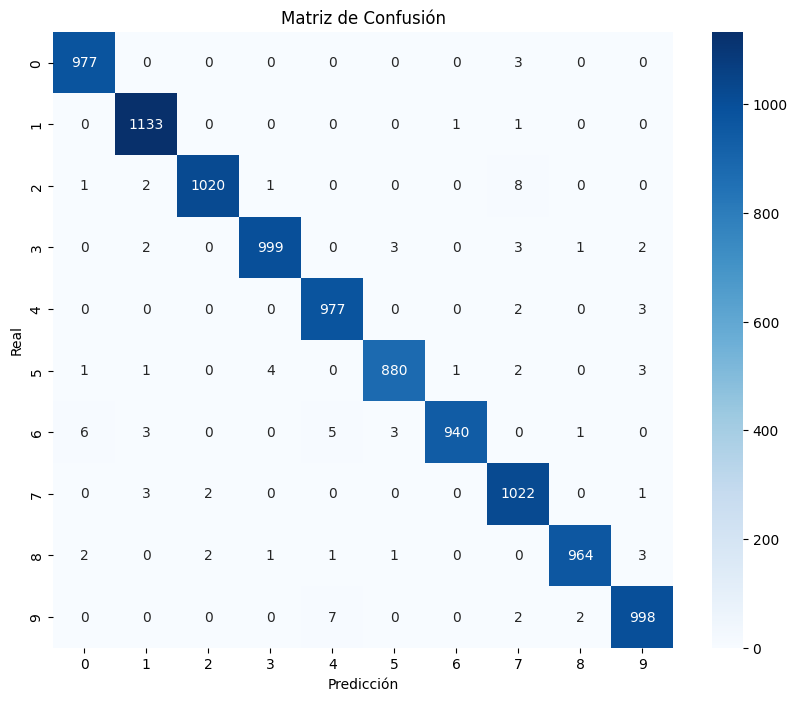

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_hat)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Para corroborar esta información, podemos ver, mediante la matriz de confusión, que la mayoría de datos se predicen bastante bien, con errores mínimos. Con un monitoreo continuo y ajustes según sea necesario, este modelo puede ser muy efectivo para la tarea de clasificación en el conjunto de datos MNIST.

## **6. MODELO SHALLOW LEARNING**

Para comparar los modelos de aprendizaje superficial (shallow learning) y redes neuronales convolucionales (CNNs) en la clasificación de imágenes, se seleccionó entonces el modelo k-Nearest Neighbors (k-NN). Lo escogimos porque  es un algoritmo fácil de implementar, lo que facilita su comprensión en la comparación en el modelo anterior. Además, no requiere un proceso de entrenamiento intensivo, ya que clasifica las imágenes en función de la proximidad a las muestras de entrenamiento.

In [34]:
pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar los datos de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Aplanar las imágenes
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

# Crear el modelo k-NN
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
model_KNN.fit(x_train, y_train)

# Evaluar el modelo
y_pred = model_KNN.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print(f'\nTest accuracy: {test_acc:.4f}')

# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Test accuracy: 0.9705
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



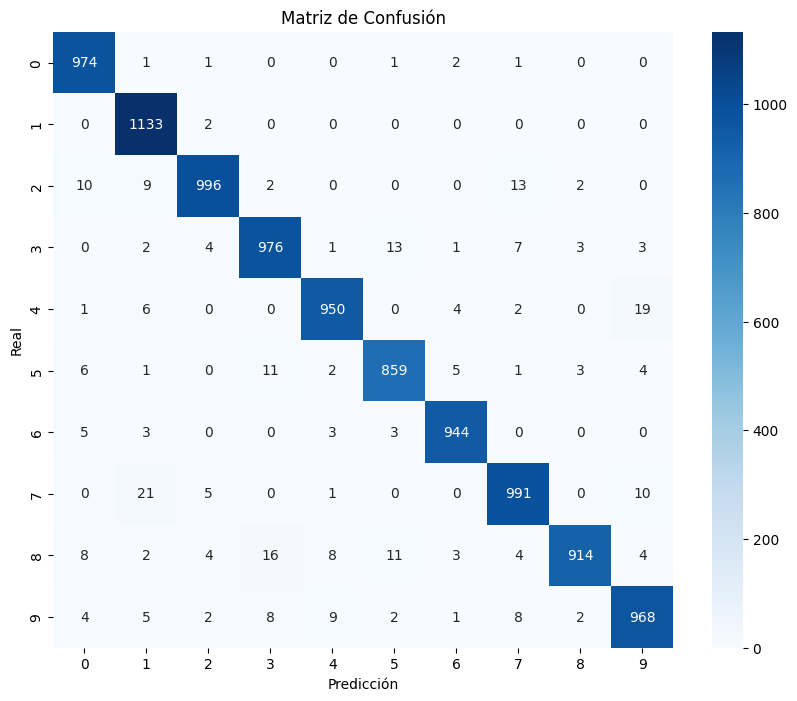

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Como resultado de este modelo k-NN, podemos observar que apesar de tener buenas métricas hay todavía datos que se predicen con error, y ésto podría perjudicar a los resultados financieros de una empresa (hablando del contexto del problema) sin embargo, se podría ajustar el modelo buscando optimizar sus resultados.


---

Al comparar los resultados con los obtenidos con la CNN se puede evidenciar un mejor rendimiento en la red convolucional, por lo que es preferible ésta, tanto en valores de `accuracy` para entrenamiento y prueba como en los valores de pérdida.

## **7. RECOMENDACIONES**

*   Es importante que, a pesar de tener buenos resultados en las estadísticas, se suguiere mantener una supervisión de los datos de salida, ya que hablando de un sistema financiero cualquier dato equívoco puede ser crítico para sus resultados.
*  Hay varios parámetros que aún se pueden ajustar para optimizar el modelo, incluso, aumentando las epochs o los trials o las ejecuciones por trials se podrían lograr mejores resultados teniendo en cuenta no sobreajustar el modelo ya que esto le quitaría validez a los datos.
*  Es crucial asegurarse de que el modelo pueda generalizarse bien a diferentes estilos de escritura y caligrafía presentes en las facturas manuscritas del mundo real. Sin embargo, una estrategia puede ser el velar por una escritura legible de los datos.
*  También es importante la calidad del scaneo o la toma de las imagenes ya que esto puede afectar los resultados.
*  Las facturas no solo contienen números, sino también texto (nombres, descripciones, fechas, etc.). Puede ser necesario complementar el modelo con técnicas de reconocimiento óptico de caracteres (OCR) más avanzadas que puedan manejar tanto números como letras.





## **8. CONCLUSIONES**


*   La alta precisión del modelo CNN indica que es muy eficaz en el reconocimiento de caracteres y números manuscritos. Esto sugiere que el modelo tiene un gran potencial para ser utilizado en la tarea de digitalización de facturas manuscritas, minimizando los errores en la transcripción de datos.
*   La implementación de esta solución puede reducir significativamente la tasa de errores humanos asociados con la entrada manual de datos de facturas. Esto mejorará la consistencia contable y reducirá los problemas de auditoría, cumpliendo con las normativas y regulaciones financieras.
*   Automatizar el proceso de digitalización de facturas manuscritas con una herramienta basada en CNN puede ahorrar una cantidad considerable de tiempo. El personal que antes estaba dedicado a la entrada manual de datos podría ser reasignado a tareas más estratégicas, mejorando la eficiencia operativa general de la empresa.
*  Finalmente, la implementación de una solución basada en redes neuronales convolucionales para la digitalización de facturas manuscritas muestra un gran potencial para mejorar la precisión, eficiencia y cumplimiento normativo en el sector financiero. Sin embargo, se debe prestar atención a la adaptación del modelo a las condiciones del mundo real y a la inclusión de técnicas adicionales para garantizar un desempeño óptimo en escenarios prácticos.
